# Датасет описывает выборку pulsar кандидатов, собранных в ходе обследования Вселенной высокого разрешения времени 
Пульсары - редкий тип нейтронных звезд, которые производят радиоизлучение, обнаруживаемое здесь, на Земле. Они представляют значительный научный интерес как зонды пространства-времени, межзвездной среды и состояний материи .

* Задача обучения - Классификация
* Характер целевой переменной - Бинарный
* Количество наблюдений - 17898
* Количество признаков - 9
* Предметная область - Астрономия, Predicting a Pulsar Star
* Содержание признаков: Первые четыре представляют собой простые статистические данные, полученные из интегрированного импульсного профиля (сложенного профиля). Это массив непрерывных переменных, описывающих версию сигнала, разрешенную по долготе, которая была усреднена как по времени, так и по частоте . Остальные четыре переменные аналогично получены из Кривой DM-SNR . Они кратко изложены ниже:
    1. Среднее интегрированного профиля.
    2. Стандартное отклонение интегрированного профиля.
    3. Избыточный куртоз интегрированного профиля-это показатель, который отражает остроту вершины и толщину хвостов одномерного распределения.
    4. Асимметрия интегрированного профиля.
    5. Среднее Кривой DM-SNR.
    6. Стандартное отклонение Кривой DM-SNR.
    7. Избыточный куртоз Кривой DM-SNR.
    8. Асимметрия Кривой DM-SNR.
    9. Класс

In [31]:
#считываем датафрейм с информацией о пульсарной звезде
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_csv('pulsar_stars.csv')
data_1 = data_1.rename(columns={' Mean of the integrated profile':"mean_profile",
       ' Standard deviation of the integrated profile':"std_profile",
       ' Excess kurtosis of the integrated profile':"kurtosis_profile",
       ' Skewness of the integrated profile':"skewness_profile", 
        ' Mean of the DM-SNR curve':"mean_dmsnr_curve",
       ' Standard deviation of the DM-SNR curve':"std_dmsnr_curve",
       ' Excess kurtosis of the DM-SNR curve':"kurtosis_dmsnr_curve",
       ' Skewness of the DM-SNR curve':"skewness_dmsnr_curve",
       })

In [32]:
data_1.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
#Число строк (записей) и столбцов (признаков):
data_1.shape

(17898, 9)

In [4]:
#Посмотрим на признаки и убедимся, что пропусков ни в одном из них нет – везде по 17898 записи.
#b.	приведение всех признаков к бинарной либо числовой шкале;-они итак в бинарной и числовой)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_profile            17898 non-null float64
std_profile             17898 non-null float64
kurtosis_profile        17898 non-null float64
skewness_profile        17898 non-null float64
mean_dmsnr_curve        17898 non-null float64
std_dmsnr_curve         17898 non-null float64
kurtosis_dmsnr_curve    17898 non-null float64
skewness_dmsnr_curve    17898 non-null float64
target_class            17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Аномалий в датасете нет, поэтому проверять на их наличие - нет смысла) но для таких целей можно было бы  построить ящик с усами

In [5]:
#Посмотрим на распределение целевой функции - 0 не является звездой, 1 -пульсарная звезда
data_1['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

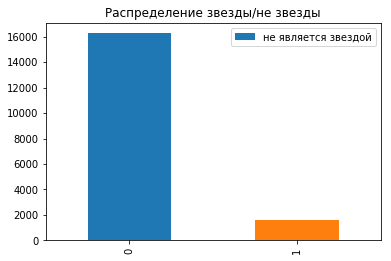

In [57]:
#отобразим визуально
data_1['target_class'].value_counts().plot(kind='bar', label='не является звездой')
plt.legend()
plt.title('Распределение звезды/не звезды');

Как видим, гораздо больше записей, где класс 0

In [6]:
#выделим целевую переменную
Y= data_1.target_class
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_class, dtype: int64

In [7]:
X = data_1.drop(['target_class'], axis=1)
X.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306



### Методы обучения без учителя: Понижение размерности с методом t-SNE

Метод моделирует каждый объект пространства высокой размерности в двухкоординатную точку таким образом, что близкие по характеристикам элементы данных в многомерном пространстве (например, датасете с большим числом столбцов) проецируются в соседние точки, а разнородные объекты с большей вероятностью моделируются точками, далеко отстоящими друг от друга.

In [8]:
# Импорт библиотек
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [51]:
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(X.values)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

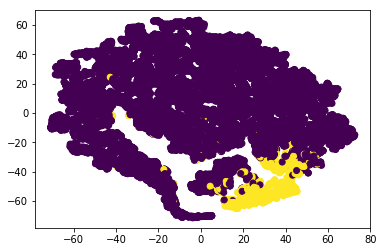

In [62]:
plt.scatter(x_axis, y_axis, c=Y.values)
plt.show()

### определим важность признака:

In [47]:
 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)
 

[0.19900402 0.07081118 0.22726562 0.24736036 0.05848014 0.08477426
 0.06457175 0.04773267]


#получили оценки для каждого признака, чем больше значение оценки, тем важнее признак   

По оценкам видим, что наилучшие признаки по номерами 1, 3, 4, 6

In [12]:
# удаленим 8-признак, т к он самый незначащий 
data_1 = data_1.drop(['skewness_dmsnr_curve'], axis=1)
data_1.head()


,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,0


In [13]:
#общая статистика по каждому столбцу
#исследование шкалы измерения каждого существенного признака;
#по каждому столбику можно посмотреть min и max
data_1.describe()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1.000000


In [14]:
#анализ количества и распределения отсутствующих значений; как видим их нет)
print (data_1.isnull().sum())

mean_profile            0
std_profile             0
kurtosis_profile        0
skewness_profile        0
mean_dmsnr_curve        0
std_dmsnr_curve         0
kurtosis_dmsnr_curve    0
target_class            0
dtype: int64


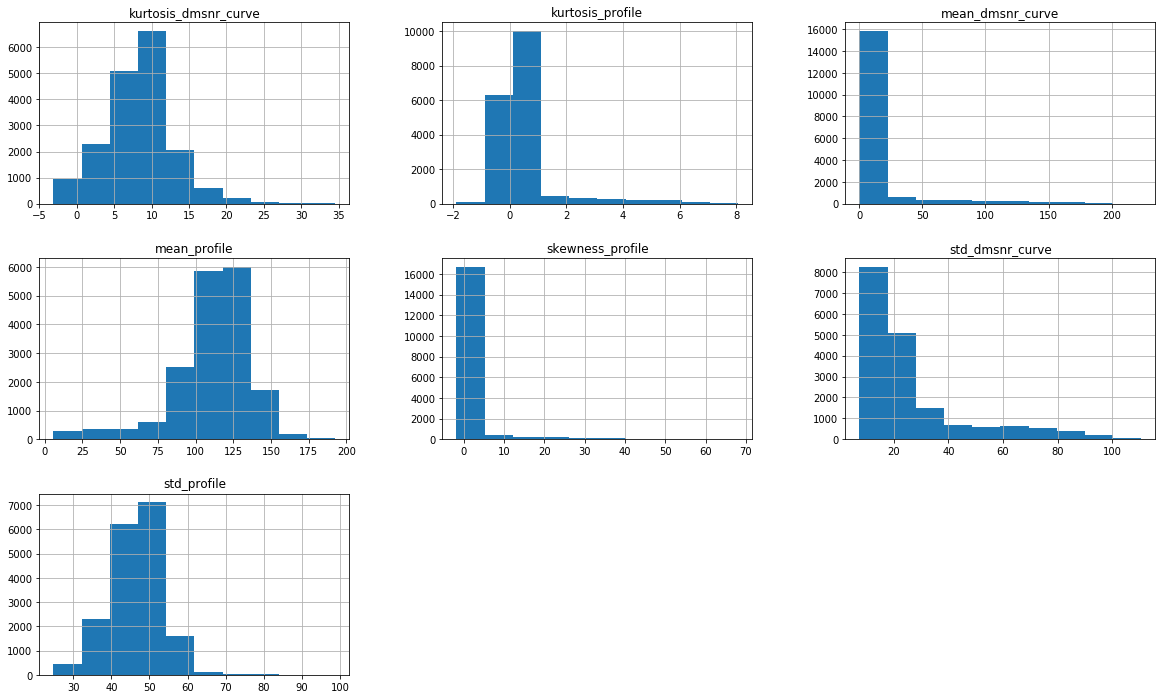

In [15]:
#посмотрим на распределения всех признаков
features = list(set(data_1.columns) - set(['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile',  'Skewness of the integrated profile',
                                      'Mean of the DM-SNR curve',   'Standard deviation of the DM-SNR curve',   'Excess kurtosis of the DM-SNR curve',
                                        'Skewness of the DM-SNR curve', 'target_class']))

data_1[features].hist(figsize=(20,12));

распределены нормально:

* Excess kurtosis of the DM-SNR curve,
* Standard deviation of the integrated profile,
* Mean of the integrated profile,

Т.к мой датасет числовой, будет разумно построить скрипичный график:

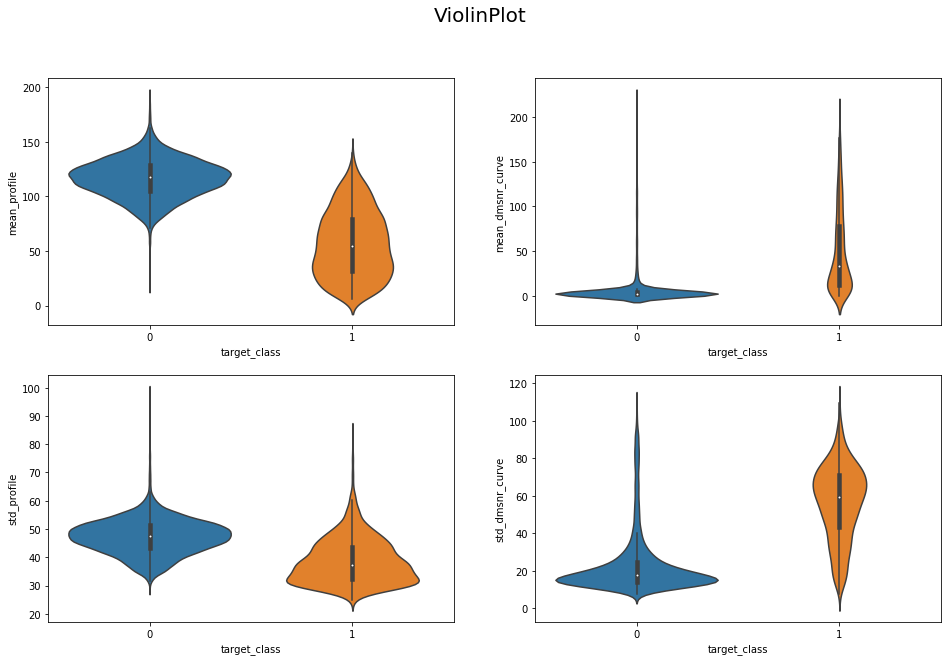

In [16]:
#график распределения значимых признаков относительно целевой переменной
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.violinplot(data=data_1,y="mean_profile",x="target_class")

plt.subplot(2,2,2)
sns.violinplot(data=data_1,y="mean_dmsnr_curve",x="target_class")

plt.subplot(2,2,3)
sns.violinplot(data=data_1,y="std_profile",x="target_class")

plt.subplot(2,2,4)
sns.violinplot(data=data_1,y="std_dmsnr_curve",x="target_class")


plt.suptitle("ViolinPlot",fontsize=20)

plt.show()

По графику видно, что данные имеют различные виды распределений

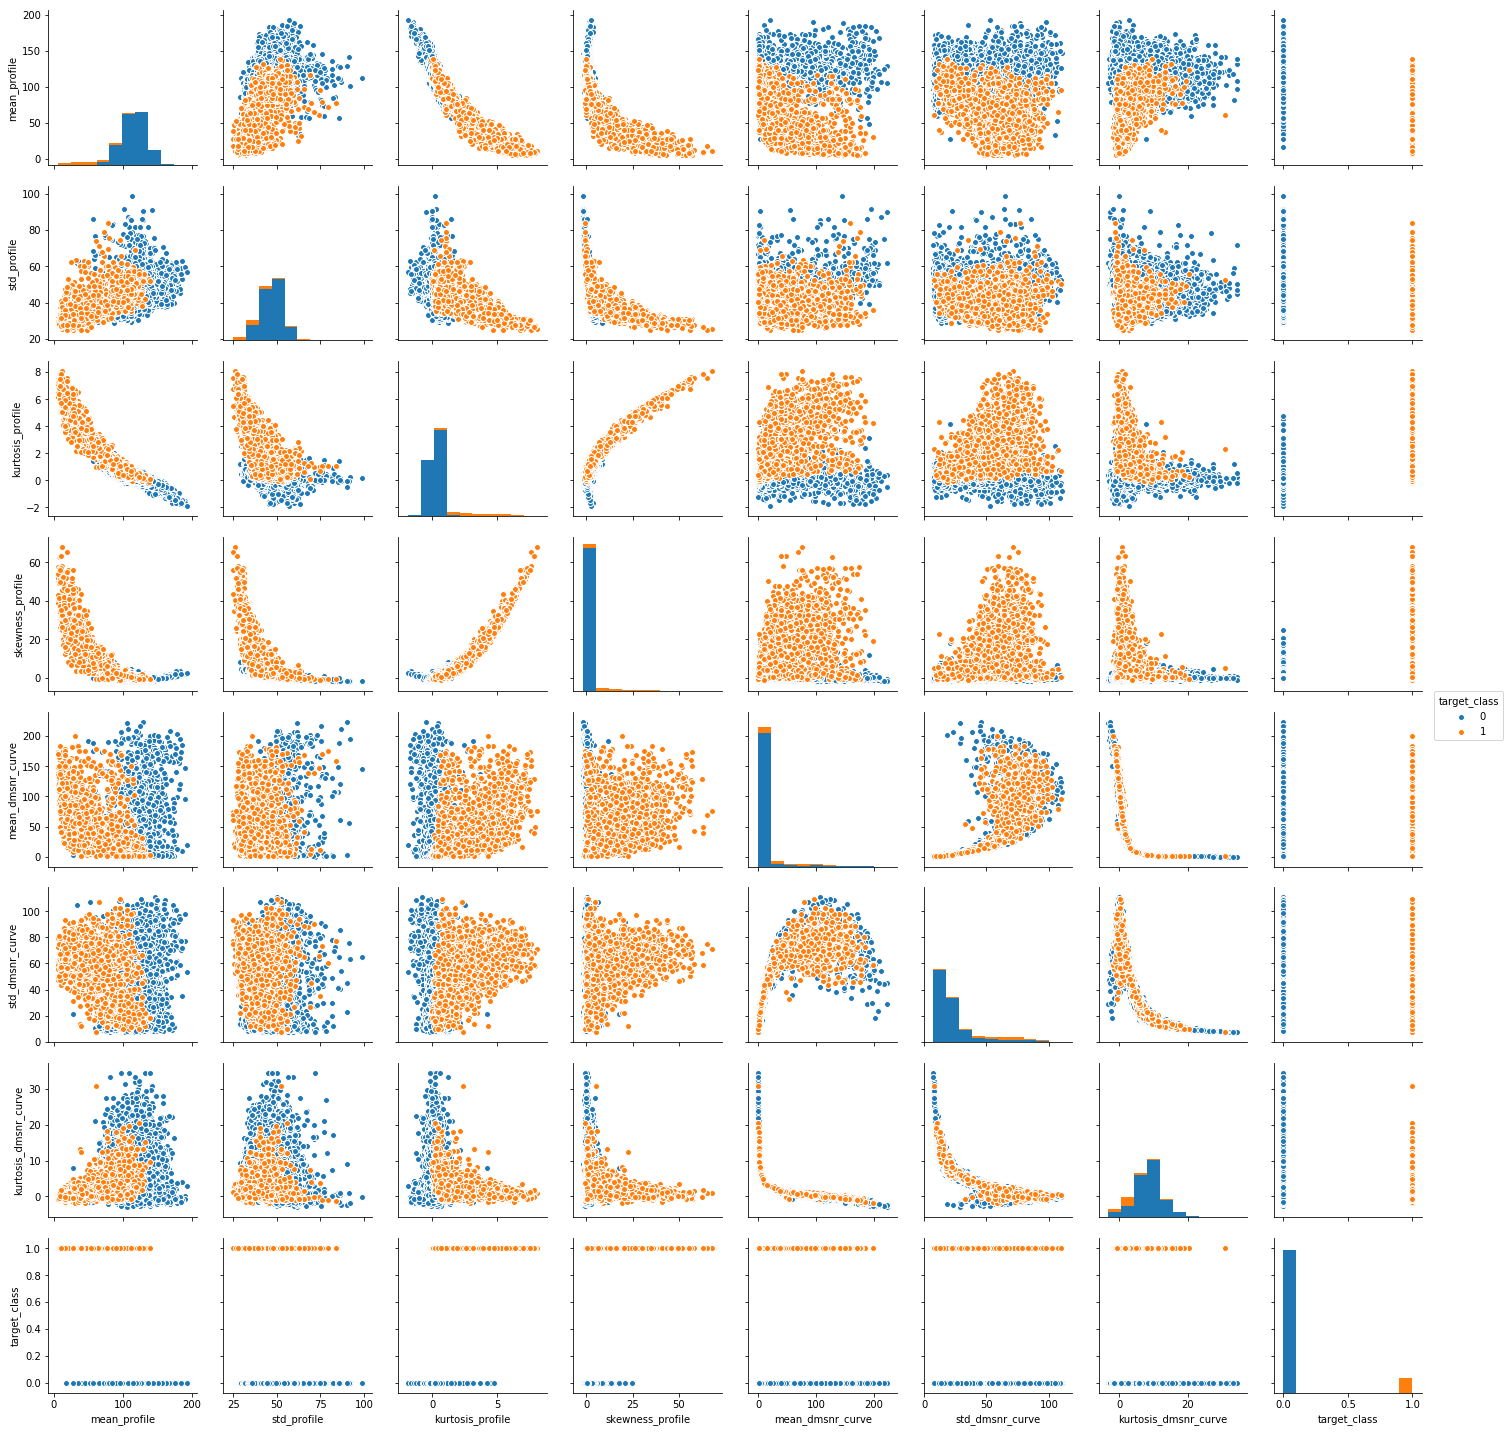

In [17]:
#построение совместного распределения каждого признака и целевой переменной;
#Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки, 
#на главной диагонали рисуются распределения признаков, а вне главной диагонали – диаграммы рассеяния для пар признаков
sns.pairplot(data_1,hue="target_class")
plt.show()

In [18]:
 # построение корреляционной матрицы
correlation = data_1.corr()
    

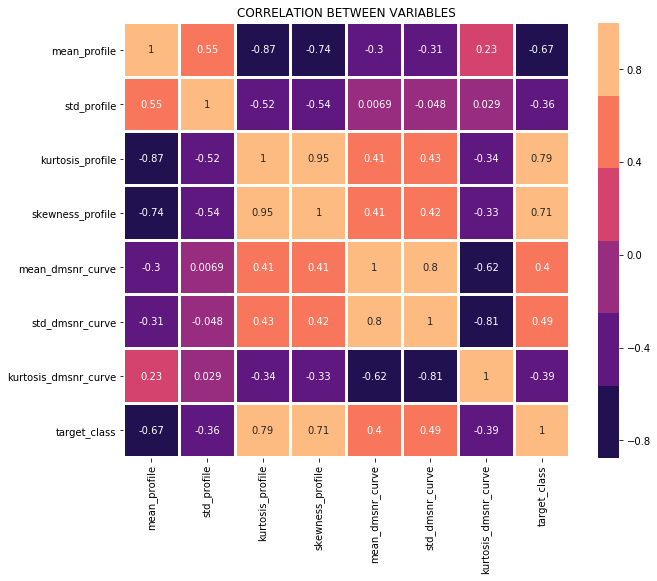

In [19]:
#светлые и темные клетки наиболее коррелируют
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [10]:
#Разделяем датасет на тестовую и обучающую выборки (80/20)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

# Возьмем для графиков кривых обучения один интервал - ( 0.937, 0.99 )  и увеличим количество точек с 5 до 8

In [33]:
#Функция для отрисовки графичка
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(model, title, X, y, ylim=([float(0.937), float(0.99)]), cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 8)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        #plt.ylim([float(0.8), float(1)])
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# 1- Строим модель логистической регрессии

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [120]:
%%time
cls = LogisticRegression()
cls.fit(x_train, y_train) #обучение
y_pred = cls.predict(x_test) # предсказание


Wall time: 112 ms


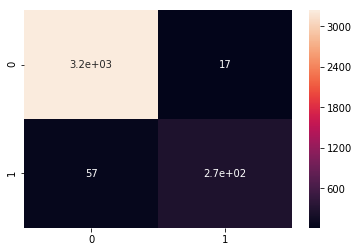

In [121]:
cls_score = cls.score(x_test,y_test)
cls = LogisticRegression()
cls.fit(x_train, y_train) #обучение
y_pred = cls.predict(x_test) # предсказание
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)


sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [122]:
#сверх простой способ))))  создать сводную таблицу
a=metrics.accuracy_score(y_test, y_pred)
 
b=metrics.precision_score(y_test, y_pred)
 
c=metrics.recall_score(y_test, y_pred)
 
d=metrics.f1_score(y_test, y_pred)

t= "112.8 ms"

log_r = np.array([a, b, c, d, t])
log_r

array(['0.9793296089385475', '0.9409722222222222', '0.8262195121951219',
       '0.8798701298701298', '112.8 ms'], dtype='<U32')

In [46]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3252
          1       0.94      0.83      0.88       328

avg / total       0.98      0.98      0.98      3580



In [38]:
#Построим кривую обучения для диагностики

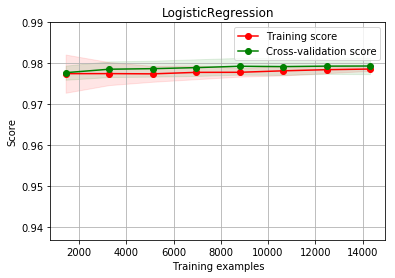

In [51]:
model = LogisticRegression()
title = "LogisticRegression"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()


переобученная модель

# 2-Строим модель на основе метода опорных векторов - самая хорошая  

С — параметр регуляризации. Он контролирует соотношение между гладкой границей и корректной классификацией рассматриваемых точек

In [35]:
from sklearn import svm
from sklearn.svm import SVC 

In [36]:
%%time
support = svm.SVC(kernel='linear')
support.fit(x_train, y_train)
y_pred = support.predict(x_test)


Wall time: 53.4 s


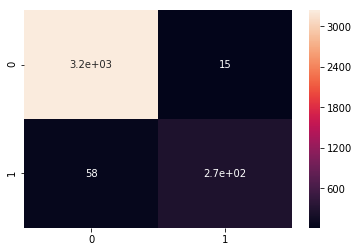

In [37]:
support_score = support.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [87]:
a1=metrics.accuracy_score(y_test, y_pred)
 
b1=metrics.precision_score(y_test, y_pred)
 
c1=metrics.recall_score(y_test, y_pred)
 
d1=metrics.f1_score(y_test, y_pred)

t1= "34.3 s"

svm_lin = np.array([a1, b1, c1, d1, t1])
svm_lin

array(['0.979608938547486', '0.9473684210526315', '0.823170731707317',
       '0.8809135399673735', '34.3 s'], dtype='<U32')

In [88]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3252
          1       0.95      0.82      0.88       328

avg / total       0.98      0.98      0.98      3580



 построение графика с регулязацией C=1))))

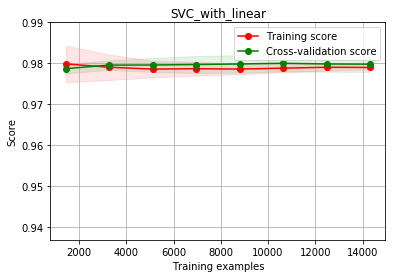

In [38]:
model = SVC(kernel='linear', C=1 )
title = "SVC_with_linear"
plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

### Вывод подобранных оптимальных  параметров: 


In [22]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV 
parameters = [{'kernel':('linear', 'rbf'), 'C':[1, 3, 6, 10]} ]
clf = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1, scoring = 'f1' ) 
clf.fit(x_train, y_train)
print("best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip (means, stds, clf.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))
print()
print('Detailed classification report:')
print()
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_test, y_pred, target_names=['не пульсарная', 'пульсарная'] ))

best parameters set found on development set:

{'C': 6, 'kernel': 'linear'}

Grid scores on development set:

0.877 (+/-0.035) for {'C': 1, 'kernel': 'linear'}
0.040 (+/-0.020) for {'C': 1, 'kernel': 'rbf'}
0.878 (+/-0.035) for {'C': 3, 'kernel': 'linear'}
0.116 (+/-0.066) for {'C': 3, 'kernel': 'rbf'}
0.878 (+/-0.034) for {'C': 6, 'kernel': 'linear'}
0.114 (+/-0.065) for {'C': 6, 'kernel': 'rbf'}
0.877 (+/-0.036) for {'C': 10, 'kernel': 'linear'}
0.114 (+/-0.065) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:

               precision    recall  f1-score   support

не пульсарная       0.98      1.00      0.99      3252
   пульсарная       0.95      0.83      0.88       328

  avg / total       0.98      0.98      0.98      3580



In [19]:
#измерение эффективности модели
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
results = cross_val_score(model, x_train, y_train, cv=kf)

print(results)

[0.97835196 0.98428771 0.97660615 0.98113867 0.97520084]


переобученная модель

# 3-Строим модель методом к-ближайших соседей

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
%%time
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


Wall time: 62.8 ms


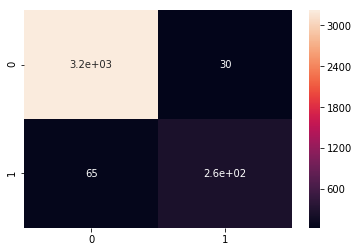

In [182]:
model_score = model.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [185]:
a7=metrics.accuracy_score(y_test, y_pred)
 
b7=metrics.precision_score(y_test, y_pred)
 
c7=metrics.recall_score(y_test, y_pred)
 
d7=metrics.f1_score(y_test, y_pred)

t7= "62.8 ms"

KNeighbors=np.array([a7, b7, c7, d7, t7])
KNeighbors

array(['0.973463687150838', '0.8976109215017065', '0.801829268292683',
       '0.8470209339774557', '62.8 ms'], dtype='<U32')

In [184]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3252
          1       0.90      0.80      0.85       328

avg / total       0.97      0.97      0.97      3580



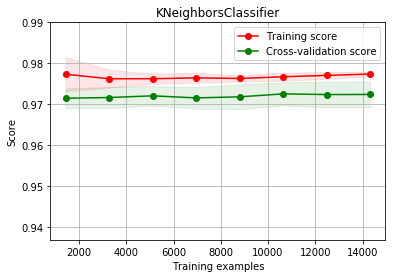

In [61]:
model = KNeighborsClassifier()
title = "KNeighborsClassifier"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

недообученная модель

# 4-Строим модель методом многослойного перцептрона

In [62]:
from sklearn.neural_network import MLPClassifier

In [130]:
%%time
slf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
slf.fit(x_train, y_train)
y_pred = slf.predict(x_test)


Wall time: 1.9 s


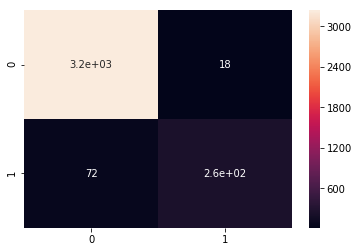

In [131]:
slf_score = slf.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [132]:
a3=metrics.accuracy_score(y_test, y_pred)
 
b3=metrics.precision_score(y_test, y_pred)
 
c3=metrics.recall_score(y_test, y_pred)
 
d3=metrics.f1_score(y_test, y_pred)

t3= "1.9 s"

MLP = np.array([a3, b3, c3, d3, t3])
MLP

array(['0.9748603351955307', '0.9343065693430657', '0.7804878048780488',
       '0.8504983388704319', '1.9 s'], dtype='<U32')

In [65]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3252
          1       0.93      0.78      0.85       328

avg / total       0.97      0.97      0.97      3580



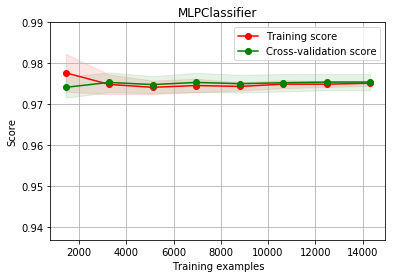

Wall time: 47.4 s


In [66]:
%%time
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
title = "MLPClassifier"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

хорошая модель

# 5-Строим модель методом опорных векторов с гаусовым ядром

In [133]:
%%time
svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)


Wall time: 4.38 s


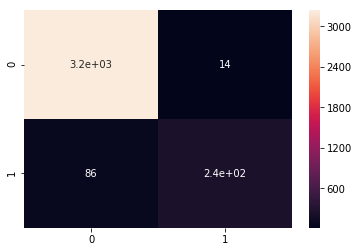

In [134]:
svclassifier_score = svclassifier.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [135]:
a4=metrics.accuracy_score(y_test, y_pred)
 
b4=metrics.precision_score(y_test, y_pred)
 
c4=metrics.recall_score(y_test, y_pred)
 
d4=metrics.f1_score(y_test, y_pred)

t4= "4.38 s"

SVC_rbf = np.array([a4, b4, c4, d4, t4])
SVC_rbf

array(['0.9720670391061452', '0.9453125', '0.7378048780487805',
       '0.8287671232876712', '4.38 s'], dtype='<U32')

In [69]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3252
          1       0.95      0.74      0.83       328

avg / total       0.97      0.97      0.97      3580



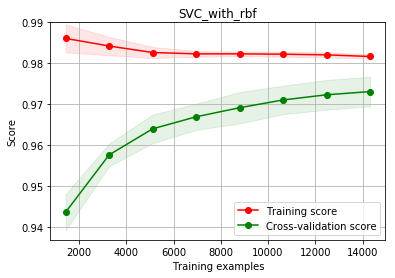

Wall time: 1min 34s


In [70]:
model = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
title = "SVC_with_rbf"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

хорошая модель, недообученная

# 6-Берем для интереса Naive Bayes methods

In [71]:
from sklearn.naive_bayes import GaussianNB

In [146]:
%%time
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

Wall time: 4.99 ms


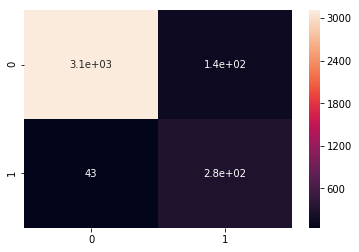

In [147]:
gnb_score = gnb.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [148]:
a5=metrics.accuracy_score(y_test, y_pred)
 
b5=metrics.precision_score(y_test, y_pred)
 
c5=metrics.recall_score(y_test, y_pred)
 
d5=metrics.f1_score(y_test, y_pred)

t5= "4.99 ms"

GaussNB = np.array([a5, b5, c5, d5, t5])
GaussNB

array(['0.9483240223463687', '0.667447306791569', '0.8689024390243902',
       '0.7549668874172185', '4.99 ms'], dtype='<U32')

In [149]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      3252
          1       0.67      0.87      0.75       328

avg / total       0.96      0.95      0.95      3580



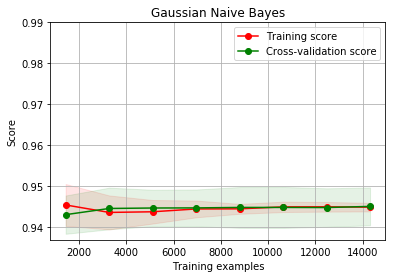

In [75]:
model = GaussianNB()
title = "Gaussian Naive Bayes"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

переобученная модель

# 7-Берем для интереса Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
%%time
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Wall time: 203 ms


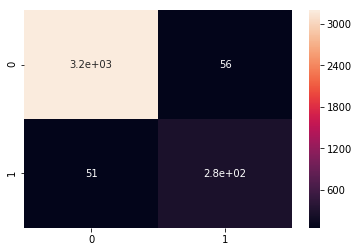

In [144]:
clf_score = clf.score(x_test,y_test)
metrics.confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True)

In [145]:
a6= metrics.accuracy_score(y_test, y_pred)
 
b6= metrics.precision_score(y_test, y_pred)
 
c6=metrics.recall_score(y_test, y_pred)
 
d6=metrics.f1_score(y_test, y_pred)

t6= "203 ms"

DecisionTree = np.array([a6, b6, c6, d6, t6])
DecisionTree

array(['0.9701117318435755', '0.8318318318318318', '0.8445121951219512',
       '0.8381240544629349', '203 ms'], dtype='<U32')

In [79]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3252
          1       0.83      0.84      0.84       328

avg / total       0.97      0.97      0.97      3580



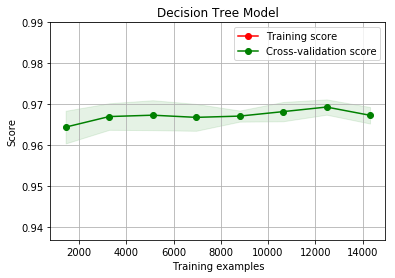

In [80]:
model = DecisionTreeClassifier()
title = "Decision Tree Model"

plot_learning_curve(model, title, X, Y, cv=cv, n_jobs=4)

plt.show()

training score (проходит по оси y=1) ужасная модель

### График сравнения оценок всех моделей:

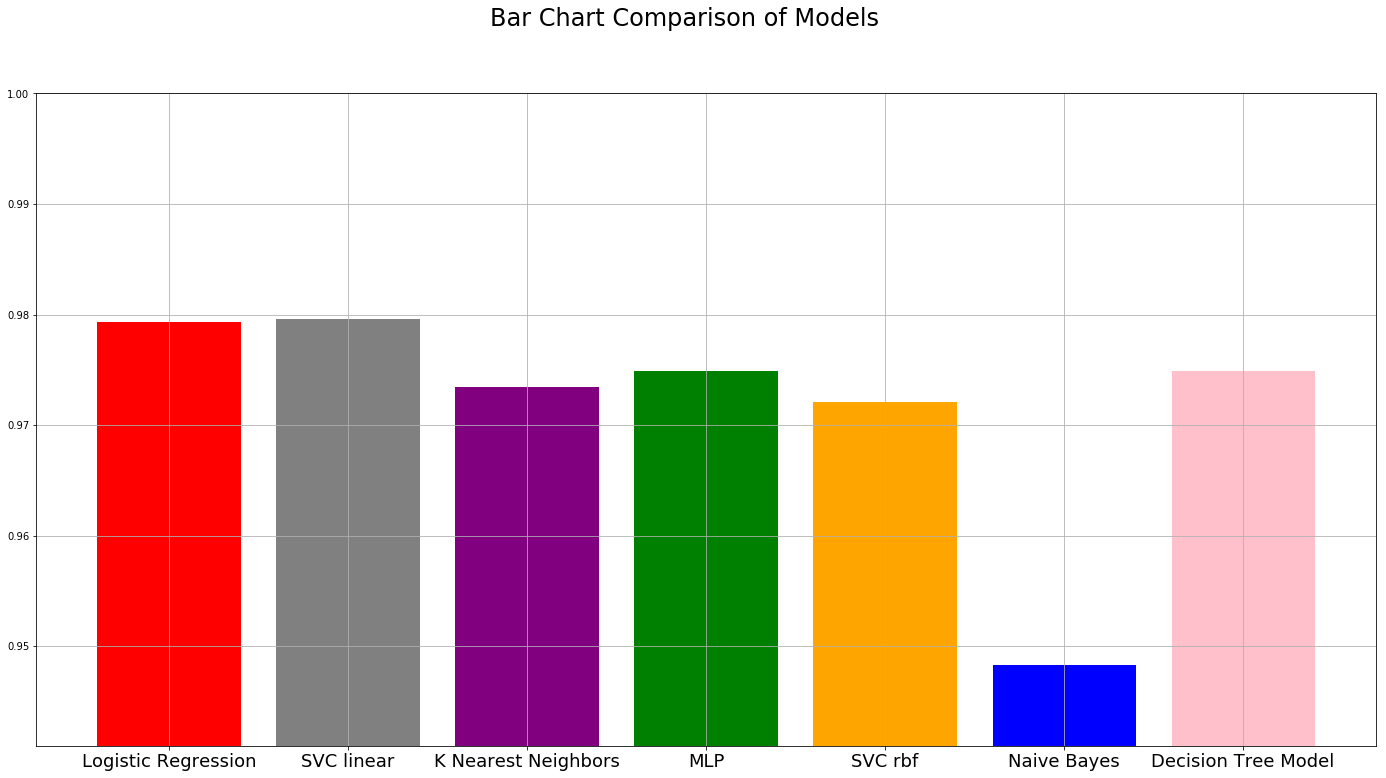

In [117]:
algorithms = ("Logistic Regression","SVC linear","K Nearest Neighbors", "MLP", "SVC rbf", "Naive Bayes","Decision Tree Model")
scores = (cls_score, support_score, model_score, slf_score, svclassifier_score, gnb_score, clf_score)
y_pos = np.arange(1,8)
colors = ("red","gray","purple","green","orange","blue", "pink")

plt.figure(figsize=(24,12))
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.01))
plt.ylim(0.941,1.00)
plt.bar(y_pos,scores,color=colors)
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=24)
plt.show()

По гистограмме видно, что самые лучшие модели это модель логистической регрессии и метод опорных векторов с линейным ядром

### Сводная таблица, где отражены все метрики и время 

In [186]:
d2 = {"log_r": np.array([a, b, c, d, t]), "svm_lin": np.array([a1, b1, c1, d1, t1]),
      "MLP": np.array([a3, b3, c3, d3, t3]) , "KNeighbors": np.array([a7, b7, c7, d7, t7]),
      "SVC_rbf": np.array([a4, b4, c4, d4, t4]) ,  "GaussNB": np.array([a5, b5, c5, d5, t5]) ,  
      "DecisionTree": np.array([a6, b6, c6, d6, t6])}

df2 = pd.DataFrame(d2, index=['accuracy', 'precision', 'recall', 'f1', 'time'])
df2

,log_r,svm_lin,MLP,KNeighbors,SVC_rbf,GaussNB,DecisionTree
accuracy,0.9793296089385475,0.979608938547486,0.9748603351955307,0.973463687150838,0.9720670391061452,0.9483240223463687,0.9701117318435755
precision,0.9409722222222222,0.9473684210526315,0.9343065693430657,0.8976109215017065,0.9453125,0.667447306791569,0.8318318318318318
recall,0.8262195121951219,0.823170731707317,0.7804878048780488,0.801829268292683,0.7378048780487805,0.8689024390243902,0.8445121951219512
f1,0.8798701298701298,0.8809135399673735,0.8504983388704319,0.8470209339774557,0.8287671232876712,0.7549668874172185,0.8381240544629349
time,112.8 ms,34.3 s,1.9 s,62.8 ms,4.38 s,4.99 ms,203 ms
